## Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Helper functions

In [2]:
def add_empty_line(filename):
    with open(filename,'a') as file:
        file.write("\n")

def add_text(filename, text):
    with open(filename,'a') as file:
        file.write(text + "\n")

def add_separator(filename):
    with open(filename,'a') as file:
        file.write("##########\n\n")

def clear_file(filename):
    with open(filename,'w') as file:
        file.write("")

## Setup output file

In [3]:
comment = "Data description"

output_file = "ResultsColocation.csv"
clear_file(output_file)
add_separator(output_file)
add_text(output_file, comment)
add_empty_line(output_file)

## Create data set from file

In [4]:
input_file = "CompareColocation.csv"

data_raw = pd.read_csv(input_file)
data_raw

,NAM 1 Hum,NAM 2 Hum,NAM 1 Temp,NAM 2 Temp,Luftdaten Hum,Luftdaten Temp,Luftdaten PM10,Luftdaten PM2.5,Reference PM10,Reference PM2.5
0,32.98,29.52,22.44,24.35,25.24,33.03,6.144583,1.817083,37.3,12.4
1,29.13,27.58,23.75,25.11,26.95,29.98,4.992609,1.788261,36.3,10.8
2,29.48,28.70,24.26,25.40,32.90,25.45,6.684167,1.894167,30.1,10.2
3,28.76,28.01,24.17,25.25,32.92,25.35,5.489130,1.889565,33.1,11.1
4,27.21,27.12,25.75,26.10,33.55,25.32,5.492500,1.811250,34.9,11.2
...,...,...,...,...,...,...,...,...,...,...
8779,89.46,94.57,20.45,19.72,99.90,19.24,NaN,NaN,34.0,30.2
8780,81.89,92.20,22.03,20.78,99.90,20.62,NaN,NaN,33.1,28.1
8781,70.47,83.17,25.05,22.73,96.53,25.18,NaN,NaN,31.3,22.3
8782,60.90,72.81,27.05,25.11,65.98,34.66,NaN,NaN,36.8,20.1


## Reorder columns

In [5]:
col_order = ["Luftdaten Temp","NAM 1 Temp", "NAM 2 Temp",
             "Luftdaten Hum","NAM 1 Hum", "NAM 2 Hum",
             "Luftdaten PM2.5", "Reference PM2.5",
             "Luftdaten PM10", "Reference PM10"]

data = data_raw[col_order].copy()
data

,Luftdaten Temp,NAM 1 Temp,NAM 2 Temp,Luftdaten Hum,NAM 1 Hum,NAM 2 Hum,Luftdaten PM2.5,Reference PM2.5,Luftdaten PM10,Reference PM10
0,33.03,22.44,24.35,25.24,32.98,29.52,1.817083,12.4,6.144583,37.3
1,29.98,23.75,25.11,26.95,29.13,27.58,1.788261,10.8,4.992609,36.3
2,25.45,24.26,25.40,32.90,29.48,28.70,1.894167,10.2,6.684167,30.1
3,25.35,24.17,25.25,32.92,28.76,28.01,1.889565,11.1,5.489130,33.1
4,25.32,25.75,26.10,33.55,27.21,27.12,1.811250,11.2,5.492500,34.9
...,...,...,...,...,...,...,...,...,...,...
8779,19.24,20.45,19.72,99.90,89.46,94.57,NaN,30.2,NaN,34.0
8780,20.62,22.03,20.78,99.90,81.89,92.20,NaN,28.1,NaN,33.1
8781,25.18,25.05,22.73,96.53,70.47,83.17,NaN,22.3,NaN,31.3
8782,34.66,27.05,25.11,65.98,60.90,72.81,NaN,20.1,NaN,36.8


## Visualize data sets

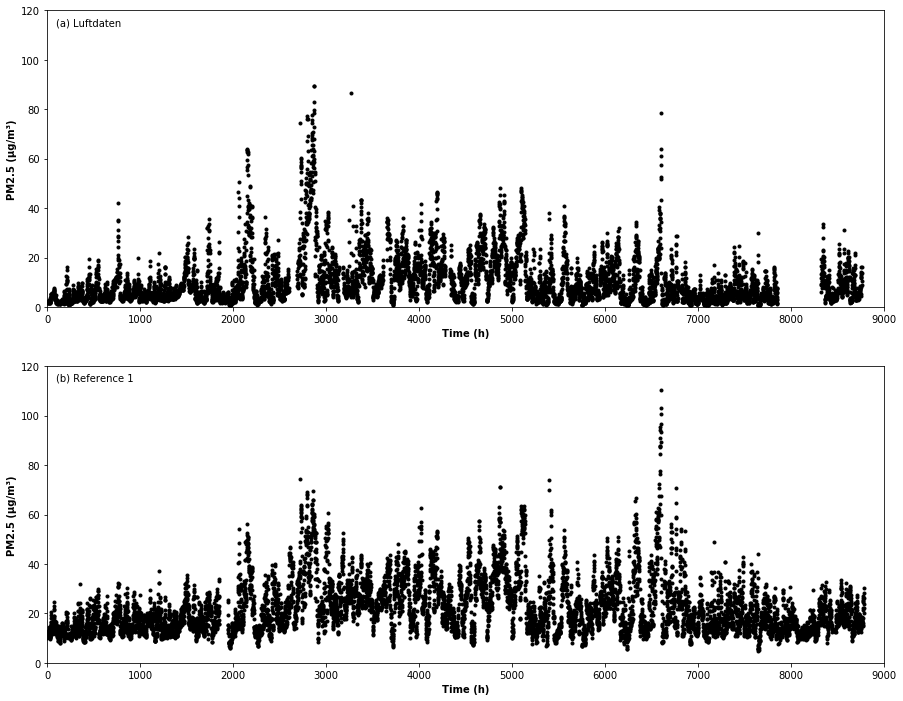

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,12))

x = data.index
y1 = data["Luftdaten PM2.5"]
y2 = data["Reference PM2.5"]

ax1.plot(x, y1, "k.")
ax1.set_xlabel("Time (h)", fontweight="bold")
ax1.set_ylabel("PM2.5 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) Luftdaten", transform=ax1.transAxes)
ax1.set_xlim([0, 9000])
ax1.set_ylim([0, 120])

ax2.plot(x, y2, "k.")
ax2.set_xlabel("Time (h)", fontweight="bold")
ax2.set_ylabel("PM2.5 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b) Reference 1", transform=ax2.transAxes)
ax2.set_xlim([0, 9000])
ax2.set_ylim([0, 120])

plt.savefig("Colocation_PM25_full.png")
plt.show()

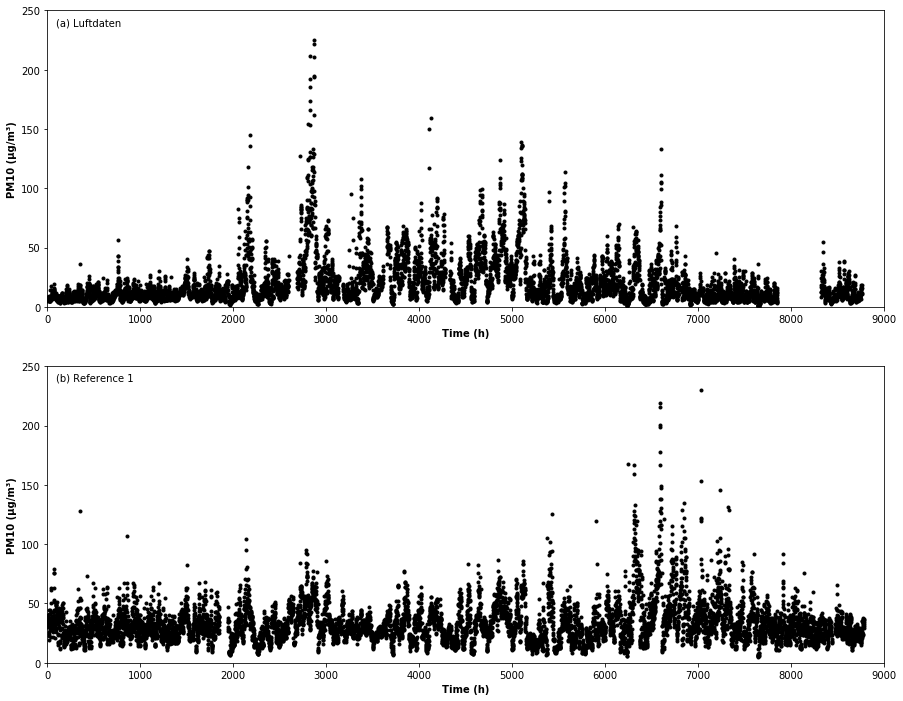

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,12))

x = data.index
y1 = data["Luftdaten PM10"]
y2 = data["Reference PM10"]

ax1.plot(x, y1, "k.")
ax1.set_xlabel("Time (h)", fontweight="bold")
ax1.set_ylabel("PM10 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) Luftdaten", transform=ax1.transAxes)
ax1.set_xlim([0, 9000])
ax1.set_ylim([0, 250])

ax2.plot(x, y2, "k.")
ax2.set_xlabel("Time (h)", fontweight="bold")
ax2.set_ylabel("PM10 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b) Reference 1", transform=ax2.transAxes)
ax2.set_xlim([0, 9000])
ax2.set_ylim([0, 250])

plt.savefig("Colocation_PM10_full.png")
plt.show()

## Calculate mean values of relative humidity and temperature

In [8]:
data.insert(3, "NAM average Temp", (data["NAM 1 Temp"] + data["NAM 2 Temp"]) / 2)
data.insert(6, "NAM average Hum", (data["NAM 1 Hum"] + data["NAM 2 Hum"]) / 2)

del data["NAM 1 Temp"]
del data["NAM 2 Temp"]
del data["NAM 1 Hum"]
del data["NAM 2 Hum"]

data

,Luftdaten Temp,NAM average Temp,Luftdaten Hum,NAM average Hum,Luftdaten PM2.5,Reference PM2.5,Luftdaten PM10,Reference PM10
0,33.03,23.395,25.24,31.250,1.817083,12.4,6.144583,37.3
1,29.98,24.430,26.95,28.355,1.788261,10.8,4.992609,36.3
2,25.45,24.830,32.90,29.090,1.894167,10.2,6.684167,30.1
3,25.35,24.710,32.92,28.385,1.889565,11.1,5.489130,33.1
4,25.32,25.925,33.55,27.165,1.811250,11.2,5.492500,34.9
...,...,...,...,...,...,...,...,...
8779,19.24,20.085,99.90,92.015,NaN,30.2,NaN,34.0
8780,20.62,21.405,99.90,87.045,NaN,28.1,NaN,33.1
8781,25.18,23.890,96.53,76.820,NaN,22.3,NaN,31.3
8782,34.66,26.080,65.98,66.855,NaN,20.1,NaN,36.8


## Visualize temperature

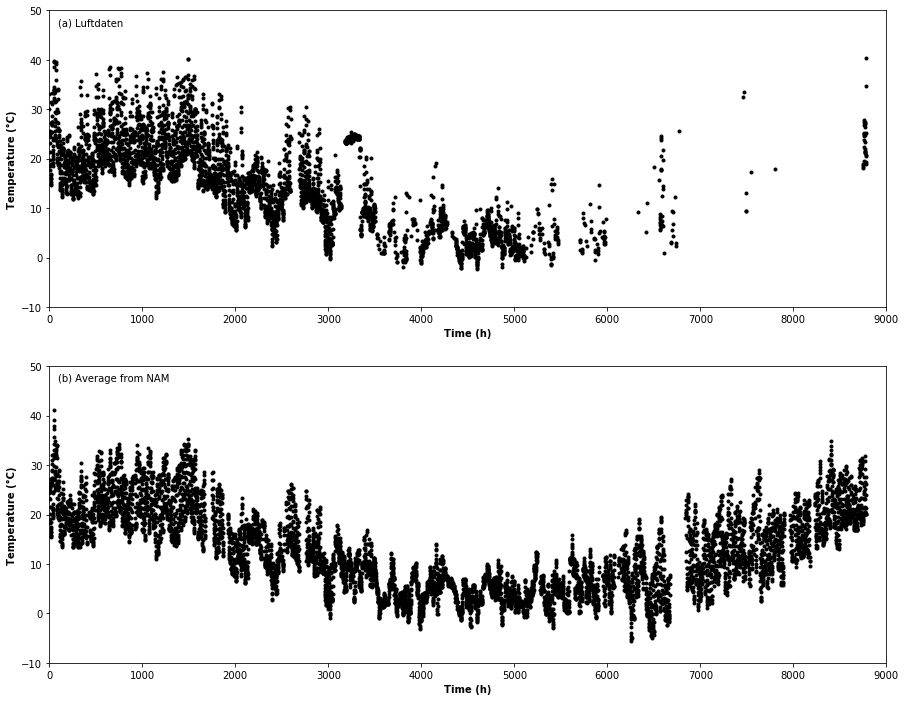

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,12))

x = data.index
y1 = data["Luftdaten Temp"]
y2 = data["NAM average Temp"]

ax1.plot(x, y1, "k.")
ax1.set_xlabel("Time (h)", fontweight="bold")
ax1.set_ylabel("Temperature (°C)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) Luftdaten", transform=ax1.transAxes)
ax1.set_xlim([0, 9000])
ax1.set_ylim([-10, 50])

ax2.plot(x, y2, "k.")
ax2.set_xlabel("Time (h)", fontweight="bold")
ax2.set_ylabel("Temperature (°C)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b) Average from NAM", transform=ax2.transAxes)
ax2.set_xlim([0, 9000])
ax2.set_ylim([-10, 50])

plt.savefig("Colocation_Temp_full.png")
plt.show()

## Pearson correlation for temperature

## Visualize humidity

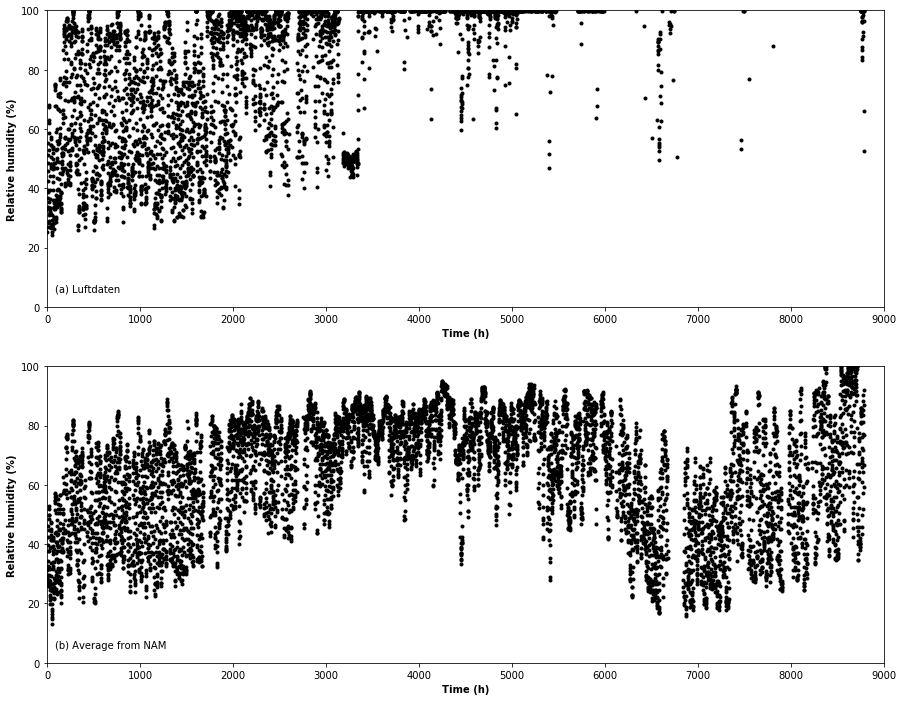

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,12))

x = data.index
y1 = data["Luftdaten Hum"]
y2 = data["NAM average Hum"]

ax1.plot(x, y1, "k.")
ax1.set_xlabel("Time (h)", fontweight="bold")
ax1.set_ylabel("Relative humidity (%)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.05
ax1.text(text_pos_x, text_pos_y, "(a) Luftdaten", transform=ax1.transAxes)
ax1.set_xlim([0, 9000])
ax1.set_ylim([0, 100])

ax2.plot(x, y2, "k.")
ax2.set_xlabel("Time (h)", fontweight="bold")
ax2.set_ylabel("Relative humidity (%)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.05
ax2.text(text_pos_x, text_pos_y, "(b) Average from NAM", transform=ax2.transAxes)
ax2.set_xlim([0, 9000])
ax2.set_ylim([0, 100])

plt.savefig("Colocation_Hum_full.png")
plt.show()

## Pearson correlation for humidity

In [11]:
data_hum = data.iloc[:,[2, 3]].copy()
result = data_hum.corr(method="pearson").round(3)
result

,Luftdaten Hum,NAM average Hum
Luftdaten Hum,1.00,0.84
NAM average Hum,0.84,1.00


## Mean absolute errors for temperature and relative humidity

In [12]:
data_mean_abs_err = data.iloc[:,[0, 1, 2, 3]].copy()
data_mean_abs_err.replace('', np.nan, inplace=True)
data_mean_abs_err.dropna(inplace=True)

output_MAE = "Mean absolute errors\n\
Temperature:,{0:.1f}\n\
Relative humidity:,{1:.1f}".format(mean_absolute_error(data_mean_abs_err["NAM average Temp"], data_mean_abs_err["Luftdaten Temp"]),
                            mean_absolute_error(data_mean_abs_err["NAM average Hum"], data_mean_abs_err["Luftdaten Hum"]))

add_text(output_file, "Mean absolute errors")
add_text(output_file, output_MAE)
add_empty_line(output_file)

print(output_MAE.replace(","," "))

Mean absolute errors
Temperature: 1.8
Relative humidity: 16.2


## Remove data from DHT11 sensor

In [13]:
del data["Luftdaten Hum"]
del data["Luftdaten Temp"]

## Remove rows without data from all sensors

In [14]:
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)
data

,NAM average Temp,NAM average Hum,Luftdaten PM2.5,Reference PM2.5,Luftdaten PM10,Reference PM10
0,23.395,31.250,1.817083,12.4,6.144583,37.3
1,24.430,28.355,1.788261,10.8,4.992609,36.3
2,24.830,29.090,1.894167,10.2,6.684167,30.1
3,24.710,28.385,1.889565,11.1,5.489130,33.1
4,25.925,27.165,1.811250,11.2,5.492500,34.9
...,...,...,...,...,...,...
8755,18.965,84.965,16.277727,16.2,18.667273,20.8
8756,19.825,85.795,16.276087,16.6,18.261739,22.4
8757,20.275,85.960,13.645652,15.6,15.597391,28.2
8758,23.240,76.245,10.630000,15.7,12.154348,25.8


## Define conditions

In [15]:
humid = data["NAM average Hum"] >= 80.0
dry = data["NAM average Hum"] <= 40.0
cold = data["NAM average Temp"] <= 5.0
hot = data["NAM average Temp"] >= 10.0
high_PM25 = data["Reference PM2.5"] >= 20
low_PM25 = data["Reference PM2.5"] < 20
high_PM10 = data["Reference PM10"] >= 50
low_PM10 = data["Reference PM10"] <= 15

# Full data set
data_sel = data

# Constrains applied
#data_sel = data[dry]

data_sel

,NAM average Temp,NAM average Hum,Luftdaten PM2.5,Reference PM2.5,Luftdaten PM10,Reference PM10
0,23.395,31.250,1.817083,12.4,6.144583,37.3
1,24.430,28.355,1.788261,10.8,4.992609,36.3
2,24.830,29.090,1.894167,10.2,6.684167,30.1
3,24.710,28.385,1.889565,11.1,5.489130,33.1
4,25.925,27.165,1.811250,11.2,5.492500,34.9
...,...,...,...,...,...,...
8755,18.965,84.965,16.277727,16.2,18.667273,20.8
8756,19.825,85.795,16.276087,16.6,18.261739,22.4
8757,20.275,85.960,13.645652,15.6,15.597391,28.2
8758,23.240,76.245,10.630000,15.7,12.154348,25.8


## Average values

In [16]:
output_PM25 = "PM2.5\n\
Luftdaten:,{0:.2f},±,{1:.2f}\n\
Reference:,{2:.2f},±,{3:.2f}".format(data_sel["Luftdaten PM2.5"].mean(), data_sel["Luftdaten PM2.5"].std(),
                                   data_sel["Reference PM2.5"].mean(), data_sel["Reference PM2.5"].std())

output_PM10 = "PM10\n\
Luftdaten:,{0:.2f},±,{1:.2f}\n\
Reference:,{2:.2f},±,{3:.2f}".format(data_sel["Luftdaten PM10"].mean(), data_sel["Luftdaten PM10"].std(),
                                   data_sel["Reference PM10"].mean(), data_sel["Reference PM10"].std())

output_conditions = "Conditions\n\
Temperature:,{0:.2f},±,{1:.2f}\n\
Humidity:,{2:.2f},±,{3:.2f}".format(data_sel["NAM average Temp"].mean(), data_sel["NAM average Temp"].std(),
                                    data_sel["NAM average Hum"].mean(), data_sel["NAM average Hum"].std())

add_text(output_file, "average values of PM2.5 and PM10 (ug/m3)")
add_text(output_file, output_PM25)
add_empty_line(output_file)
add_text(output_file, output_PM10)
add_empty_line(output_file)
add_text(output_file, output_conditions)
add_empty_line(output_file)

print(output_PM25.replace(","," "))
print()
print(output_PM10.replace(","," "))
print()
print(output_conditions.replace(","," "))

PM2.5
Luftdaten: 10.68 ± 10.30
Reference: 22.86 ± 11.50

PM10
Luftdaten: 20.53 ± 20.35
Reference: 33.43 ± 17.42

Conditions
Temperature: 12.01 ± 8.43
Humidity: 64.50 ± 19.00


## Linear regressions

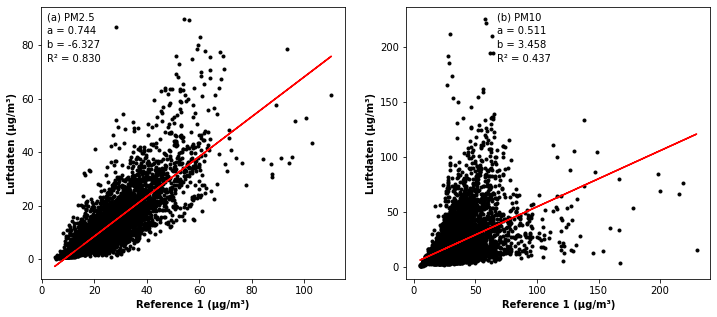

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

x = data_sel["Reference PM2.5"]
y = data_sel["Luftdaten PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax1.plot(x, y, "k.")
ax1.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) PM2.5", transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax1.transAxes)
ax1.set_xlabel("Reference 1 (µg/m³)", fontweight="bold")
ax1.set_ylabel("Luftdaten (µg/m³)", fontweight="bold")

x = data_sel["Reference PM10"]
y = data_sel["Luftdaten PM10"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax2.plot(x, y, "k.")
ax2.plot(x, intercept + slope*x, "r")
text_pos_x = 0.30
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b) PM10", transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax2.transAxes)
ax2.set_xlabel("Reference 1 (µg/m³)", fontweight="bold")
ax2.set_ylabel("Luftdaten (µg/m³)", fontweight="bold")

plt.savefig("Colocation_regressions.png")
plt.show()

## Correlation coefficients

### Select PM data columns

In [18]:
data_sel_pm = data_sel.iloc[:,[2, 3, 4, 5]].copy()
data_sel_pm

,Luftdaten PM2.5,Reference PM2.5,Luftdaten PM10,Reference PM10
0,1.817083,12.4,6.144583,37.3
1,1.788261,10.8,4.992609,36.3
2,1.894167,10.2,6.684167,30.1
3,1.889565,11.1,5.489130,33.1
4,1.811250,11.2,5.492500,34.9
...,...,...,...,...
8755,16.277727,16.2,18.667273,20.8
8756,16.276087,16.6,18.261739,22.4
8757,13.645652,15.6,15.597391,28.2
8758,10.630000,15.7,12.154348,25.8


### Pearson correlations

In [19]:
result = data_sel_pm.corr(method="pearson").round(3)
add_text(output_file, "Pearson correlations")
result.to_csv(output_file, mode="a")
add_empty_line(output_file)
result

,Luftdaten PM2.5,Reference PM2.5,Luftdaten PM10,Reference PM10
Luftdaten PM2.5,1.000,0.830,0.936,0.411
Reference PM2.5,0.830,1.000,0.808,0.686
Luftdaten PM10,0.936,0.808,1.000,0.437
Reference PM10,0.411,0.686,0.437,1.000


### Kendall correlations

In [20]:
result = data_sel_pm.corr(method="kendall").round(3)
add_text(output_file, "Kendall correlations")
result.to_csv(output_file, mode="a")
add_empty_line(output_file)
result

,Luftdaten PM2.5,Reference PM2.5,Luftdaten PM10,Reference PM10
Luftdaten PM2.5,1.000,0.686,0.799,0.287
Reference PM2.5,0.686,1.000,0.702,0.494
Luftdaten PM10,0.799,0.702,1.000,0.349
Reference PM10,0.287,0.494,0.349,1.000


### Spearman correlations

In [21]:
result = data_sel_pm.corr(method="spearman").round(3)
add_text(output_file, "Spearman correlations")
result.to_csv(output_file, mode="a")
add_empty_line(output_file)
result

,Luftdaten PM2.5,Reference PM2.5,Luftdaten PM10,Reference PM10
Luftdaten PM2.5,1.000,0.866,0.946,0.410
Reference PM2.5,0.866,1.000,0.872,0.658
Luftdaten PM10,0.946,0.872,1.000,0.501
Reference PM10,0.410,0.658,0.501,1.000


## Mean absolute errors

In [22]:
output_MAE = "Mean absolute errors\n\
Luftdaten PM2.5:,{0:.1f}\n\
Luftdaten PM10:,{1:.1f}".format(mean_absolute_error(data_sel_pm["Reference PM2.5"], data_sel_pm["Luftdaten PM2.5"]),
                            mean_absolute_error(data_sel_pm["Reference PM10"], data_sel_pm["Luftdaten PM10"]))

add_text(output_file, "Mean absolute errors")
add_text(output_file, output_MAE)
add_empty_line(output_file)

print(output_MAE.replace(","," "))

Mean absolute errors
Luftdaten PM2.5: 12.5
Luftdaten PM10: 17.9


## Mean squared errors

In [23]:
output_MSE = "Mean squared errors\n\
Luftdaten PM2.5:,{0:.1f}\n\
Luftdaten PM10:,{1:.1f}".format(mean_squared_error(data_sel_pm["Reference PM2.5"], data_sel_pm["Luftdaten PM2.5"]),
                            mean_squared_error(data_sel_pm["Reference PM10"], data_sel_pm["Luftdaten PM10"]))

add_text(output_file, "Mean squared errors")
add_text(output_file, output_MSE)
add_empty_line(output_file)
add_separator(output_file)

print(output_MSE.replace(","," "))

Mean squared errors
Luftdaten PM2.5: 190.1
Luftdaten PM10: 574.0


## Environmental conditions

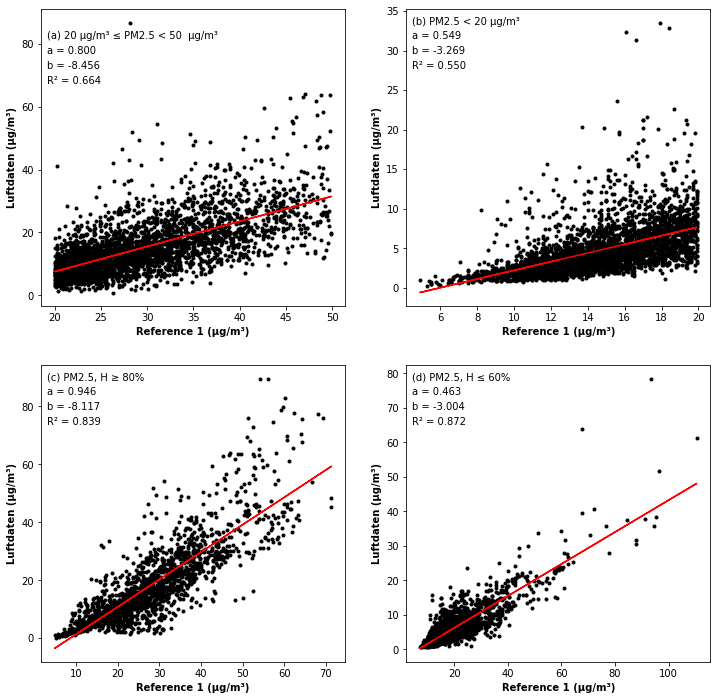

In [24]:
humid = data["NAM average Hum"] >= 80.0
dry = data["NAM average Hum"] <= 60.0
cold = data["NAM average Temp"] <= 5.0
hot = data["NAM average Temp"] >= 15.0
high_PM25 = data["Reference PM2.5"] >= 20
medium_PM25 = (data["Reference PM2.5"] >= 20) & (data["Reference PM2.5"] < 50)
low_PM25 = data["Reference PM2.5"] < 20

fig, ((ax3, ax4), (ax1, ax2)) = plt.subplots(2, 2, figsize=(12,12))

# Constrains applied
data_sel = data[humid]
x = data_sel["Reference PM2.5"]
y = data_sel["Luftdaten PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax1.plot(x, y, "k.")
ax1.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(c) PM2.5, H ≥ 80%", transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax1.transAxes)
ax1.set_xlabel("Reference 1 (µg/m³)", fontweight="bold")
ax1.set_ylabel("Luftdaten (µg/m³)", fontweight="bold")

# Constrains applied
data_sel = data[dry]
x = data_sel["Reference PM2.5"]
y = data_sel["Luftdaten PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax2.plot(x, y, "k.")
ax2.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(d) PM2.5, H ≤ 60%", transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax2.transAxes)
ax2.set_xlabel("Reference 1 (µg/m³)", fontweight="bold")
ax2.set_ylabel("Luftdaten (µg/m³)", fontweight="bold")

# Constrains applied
data_sel = data[medium_PM25]
x = data_sel["Reference PM2.5"]
y = data_sel["Luftdaten PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax3.plot(x, y, "k.")
ax3.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.90
ax3.text(text_pos_x, text_pos_y, "(a) 20 µg/m³ ≤ PM2.5 < 50  µg/m³ ", transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax3.transAxes)
ax3.set_xlabel("Reference 1 (µg/m³)", fontweight="bold")
ax3.set_ylabel("Luftdaten (µg/m³)", fontweight="bold")

# Constrains applied
data_sel = data[low_PM25]
x = data_sel["Reference PM2.5"]
y = data_sel["Luftdaten PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax4.plot(x, y, "k.")
ax4.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax4.text(text_pos_x, text_pos_y, "(b) PM2.5 < 20 µg/m³", transform=ax4.transAxes)
ax4.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax4.transAxes)
ax4.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax4.transAxes)
ax4.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax4.transAxes)
ax4.set_xlabel("Reference 1 (µg/m³)", fontweight="bold")
ax4.set_ylabel("Luftdaten (µg/m³)", fontweight="bold")

plt.savefig("Colocation_PM25_conditions.png")
plt.show()